In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../datasets/Time_analysis_preprocess_dataset.csv')

In [26]:
df.shape

(475174, 185)

In [27]:
# Find the clusters using elbow method
from sklearn.cluster import KMeans
k_values = range(1,25)
wcss_error = []
for k in k_values :
    model = KMeans(n_clusters= k)
    model.fit(df)
    wcss_error.append(model.inertia_)

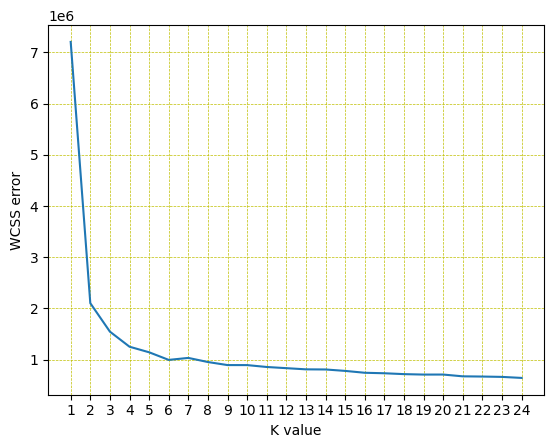

In [28]:
plt.plot(k_values, wcss_error)
plt.xlabel('K value')
plt.ylabel('WCSS error') 
plt.xticks(k_values)
plt.grid(True, linewidth = 0.5, color = 'y', linestyle = '--')

In [5]:
from sklearn.cluster import KMeans

In [13]:
# Apply K-Means algorithm
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

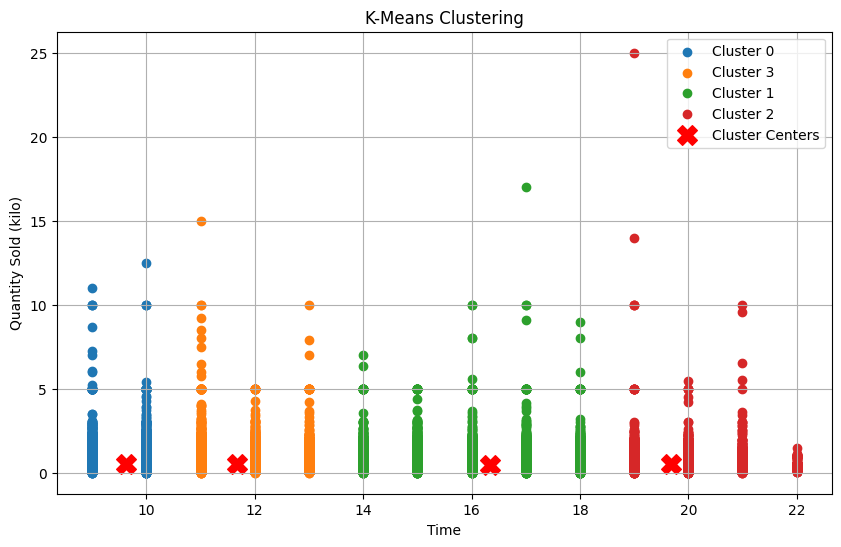

In [14]:
# Scatter plot for visualization
plt.figure(figsize=(10, 6))

# Plot each cluster
for cluster_label in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Time'], cluster_data['Quantity Sold (kilo)'], label=f'Cluster {cluster_label}')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Cluster Centers')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Quantity Sold (kilo)')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [15]:
# save the model
import pickle
with open('TimeBasedAnalysis.pickle', 'wb') as file:
    pickle.dump(kmeans, file)